## Introduction:
The project is about sales analytics generating insights from sales data, trends and metrics to set target and forecast future sales performence. The purpose of sale analysis is to evaluate the performance of sales team against its goals. The target is finding the target market which is an assessment of how your product fits into into a specific market where it will gain the most.

#### Task:
Question 1: What was the best month for sales? How much was earned that month?

Question 2: What City had the highest number of sales?

Question 3: What time should we display adverstisement to maximize likelihood of customer's buying product?

Question 4: What products are most often sold together?

Question 5: What product sold the most? Why do you think it sold the most?

Question 6: How much probability for next people will ordered:
- USB-C Charging Cable?

- iPhone?

- Google Phone?

- Wired Headphones?

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.graphics.gofplots import qqplot

Merge ther 12 months of Sales data into Single CSV file

In [2]:
files = [file for file in os.listdir('..//SALES_2019_REPORT//data')]
all_data = pd.DataFrame()
for file in files:
    data = pd.read_csv('..//SALES_2019_REPORT//data/' + file)
    all_data = pd.concat([all_data, data])
all_data.to_csv('all_data', index = False)


### Data Wrangling:

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [4]:
categorical = all_data.select_dtypes(['category','object']).columns

for col in categorical:
    print('{} : {} unique value(s)'.format(col, all_data[col].nunique()))


Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)


Check missing values

In [5]:
missing_val = all_data.isnull().sum()
missing_val

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
total_cell = np.product(all_data.shape)
total_missing = missing_val.sum()
percentage_missing = (total_missing/total_cell)*100
print(f"{percentage_missing:.2f}%")

0.29%


There are 29% missing values in the dataset which is not to big. Let's drop them 

In [7]:
all_data = all_data.dropna(how='all')
all_data[all_data.isna().any(axis=1)]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Recap data:
- We have 185950 records and 6 categorical columns
- Missing values account for 29%
- Order ID: 178437 unique value(s)
- Product: 20 unique value(s)
- Quantity Ordered: 10 unique value(s)
- Price Each: 24 unique value(s)
- Order Date: 142390 unique value(s)
- Purchase Address: 140788 unique value(s)

Convert datatypes in Quantity Ordered and Price Each columns to numeric


In [8]:
all_data = all_data[all_data['Quantity Ordered'].astype('string').str.contains("Quantity Ordered")==False]
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data['Price Each'] = all_data['Price Each'].astype('float')


Convert Order Date columns to datatime type

In [9]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [10]:
categorical = all_data.select_dtypes(['category','object']).columns

for col in categorical:
    print('{} : {} unique value(s)'.format(col, all_data[col].nunique()))

Order ID : 178437 unique value(s)
Product : 19 unique value(s)
Purchase Address : 140787 unique value(s)


Create new columns with information about Month, Hour, Minute, Year, Month, City and Sales

In [11]:
def augment_data(data):
    def get_city(address):
        return address.split(',')[1]

    def get_state(address):
        return address.split(',')[2].split(' ')[1]
    
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month
    data['Hour'] = data['Order Date'].dt.hour
    data['Minute'] = data['Order Date'].dt.minute
    data['Sale'] = data['Quantity Ordered'] * data['Price Each']
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")
    return data
    
all_data = augment_data(all_data)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sale,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,11.99,Los Angeles CA


### Data Analysis

In this section, we are looking for the correlation and also the relationshop between every features and applying the statistical and visulization methods for looking for some patterns.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'Quantity Ordered'),
  Text(0, 1.5, 'Price Each'),
  Text(0, 2.5, 'Year'),
  Text(0, 3.5, 'Month'),
  Text(0, 4.5, 'Hour'),
  Text(0, 5.5, 'Minute'),
  Text(0, 6.5, 'Sale')])

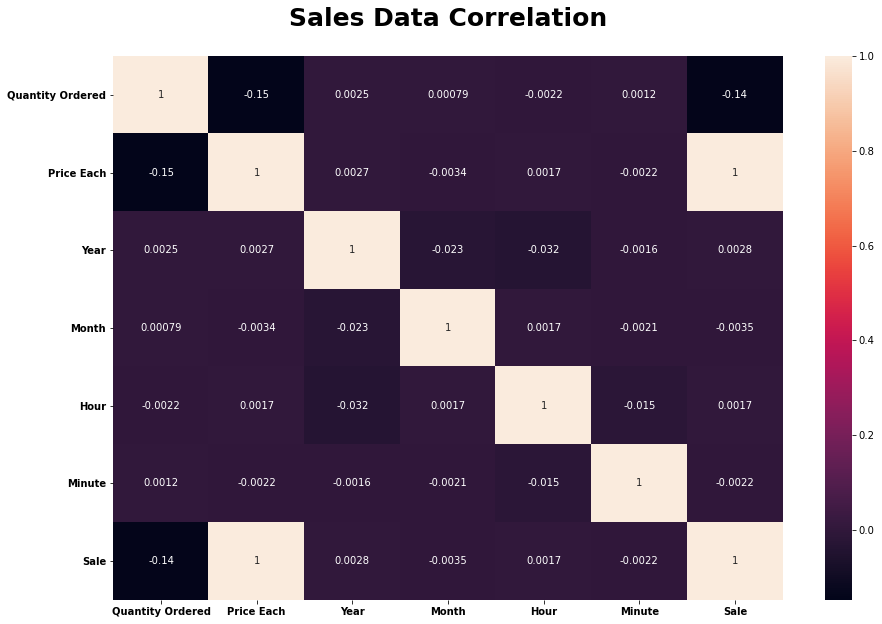

In [12]:
# The correlation from 'sales data'
plt.figure(figsize = (15,10))
sns.heatmap(all_data.corr(), annot = True)
plt.title('Sales Data Correlation', weight = 'bold', fontsize = 25, pad = 30)
plt.xticks(weight = 'bold', fontsize = 10)
plt.yticks(weight = 'bold', fontsize = 10)

In [13]:
all_data.corr()['Sale'].sort_values(ascending=False).to_frame().T

,Sale,Price Each,Year,Hour,Minute,Month,Quantity Ordered
Sale,1.0,0.999203,0.002824,0.001668,-0.002162,-0.003466,-0.139417


In [14]:
#Statitical measures of sales data without data with object type
all_data_numeric = all_data.describe(include =[np.number])
"Statistical Measure of Sales Data in Numeric Data"
all_data_numeric

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sale
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,14.413305,29.481361,185.490917
std,0.442793,332.731330,0.013521,3.502996,5.423416,17.317573,332.919771
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


#### Univariate analysis
Univariate analysis is one variable involved in statistical analysis.


In [15]:
def univariate_analysis(data, color, title1, title2):
    fig, (ax1,ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (20,6))

    sns.histplot(data, ax=ax1, kde = True, color = color)
    
    ax1.set_title(title1, weight ='bold', fontsize = 25, pad=30)

    qqplot(data, ax=ax2, line='s')
    
    ax2.set_title(title2, weight='bold', fontsize = 25, pad = 30)

    return fig

Let's try to find the proportion that lies in between two standard deviation ( σ ) from mean ( μ ) using Chebychev's Theorem, and let's try to interprete...
##### Chebychev's Theorem: 
$$
\frac{1}{1+k^2}
$$

##### Standard Deviation (σ):
$$
\sigma = \sqrt{(\sigma)^2} = \sqrt{(\frac{(\sum(x-μ)^2)}{N})}
$$

$$
s = \sqrt{(s)^2} = \sqrt{\frac{(\sum{(x-\bar{x})^2)}}{n-1}}
$$

##### Mean (μ):
$$
μ = \frac{x}{N}
$$
$$
\bar{x} = \frac{\sum{x}}{n}
$$

##### Quantity Ordered

μ = 1.12 and σ = 0.44

Calculation:
- 1.12−2(0.44)=0.2
- 1.12+2(0.44)=2
Interpretation: At least 75% of Sales Data Quantity Ordered population in the USA has a Quantity Ordered rannge from 0-2 products

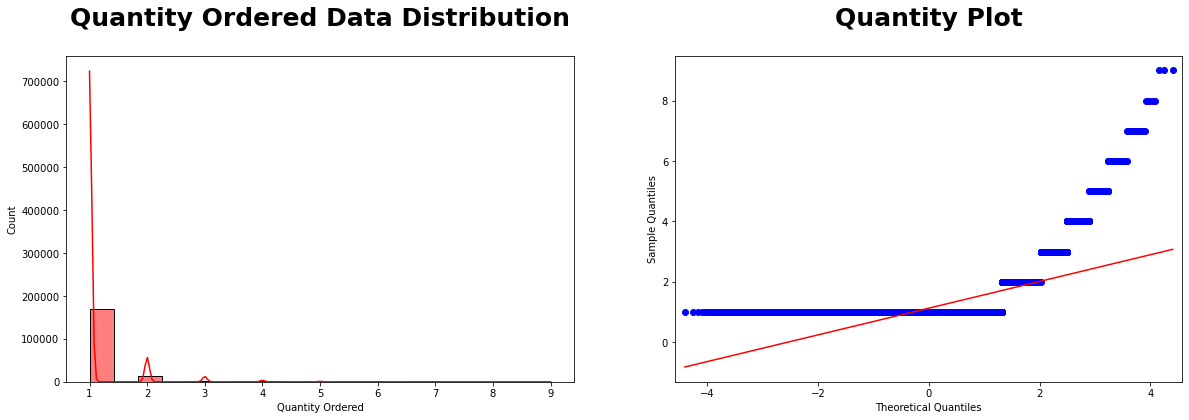

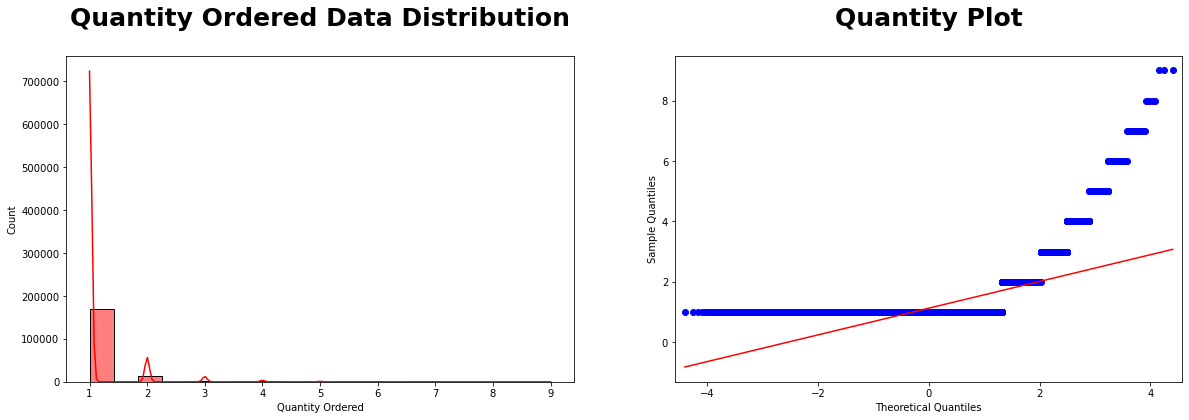

In [16]:
univariate_analysis(data=all_data['Quantity Ordered'],color='red',title1='Quantity Ordered Data Distribution',title2='Quantity Plot')

##### Price Each:
μ = 184.3, σ = 332.7 

Calculation:
- 184.3−2(332.7)=−481 
- 184.3+2(332.7)=849.7

Interpretation:
At least 75% of Sale Price data for each iterm has a price range from 0 - 849.9$

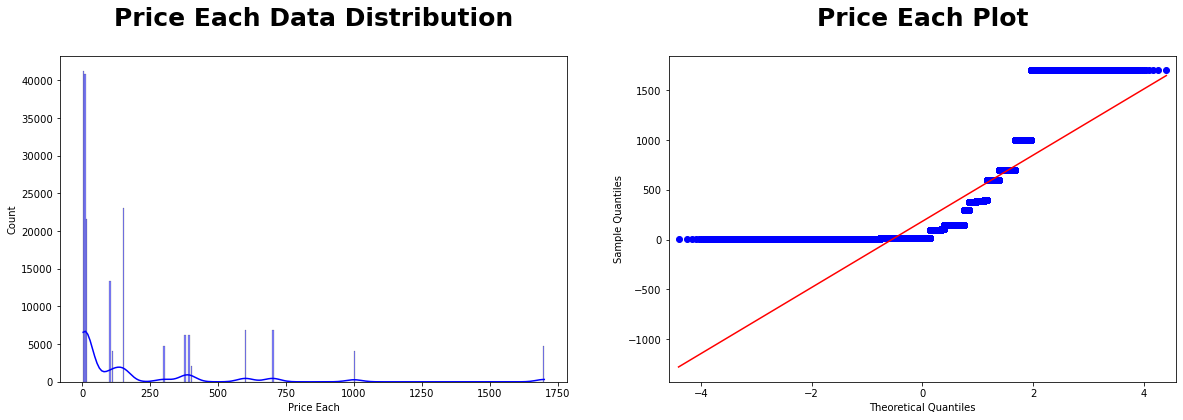

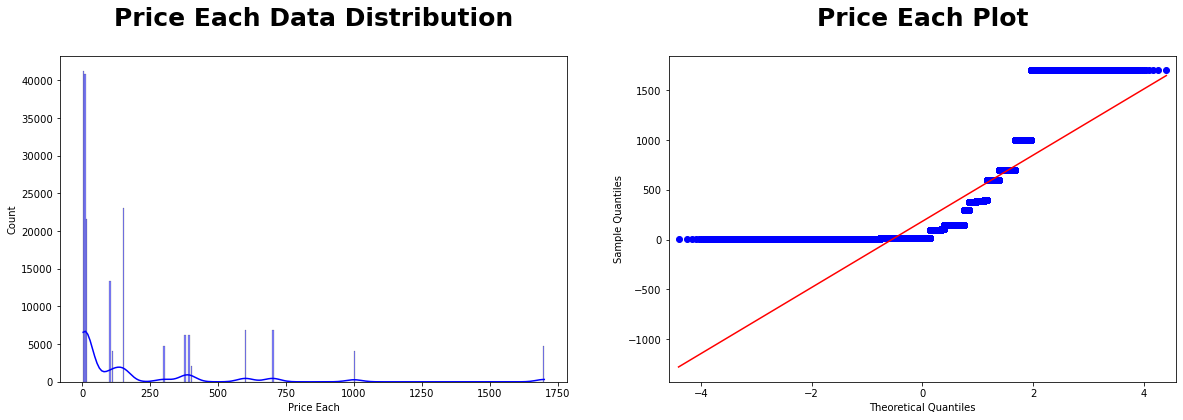

In [17]:
univariate_analysis(data=all_data['Price Each'],color='Blue',title1='Price Each Data Distribution',title2='Price Each Plot')

##### Sales:
μ = 185.4, σ = 332.9

Calculation:
- 185.4−2(332.9)=−480 
- 185.4+2(332.9)=851.19
At least 75% Sales Data customers have Sales range from 0 - 851.19$

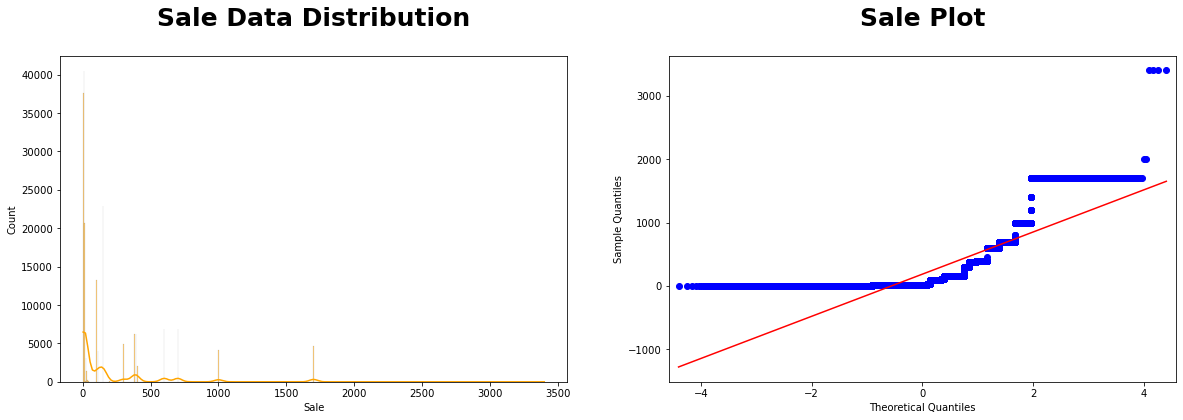

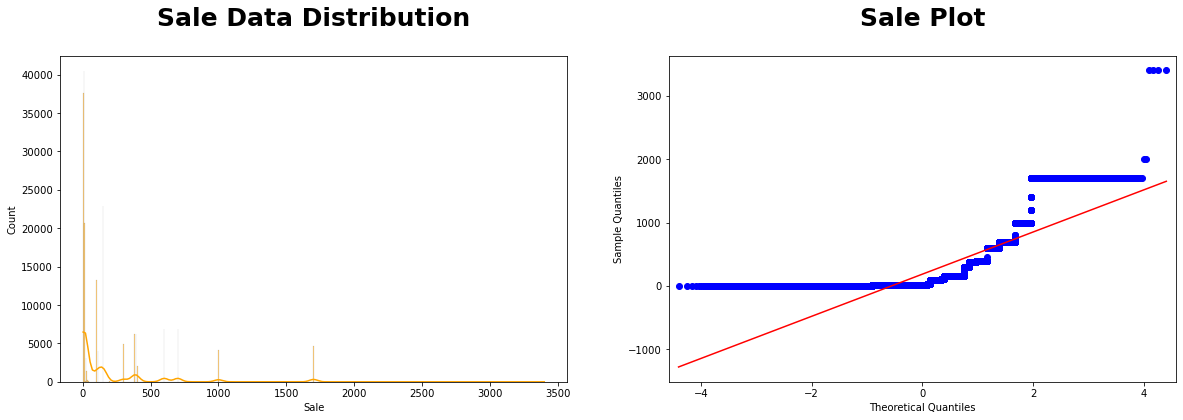

In [18]:
univariate_analysis(data=all_data['Sale'],color='Orange',title1='Sale Data Distribution',title2='Sale Plot')

#### Question 1: What was the best month for sales? How much was earned that month?

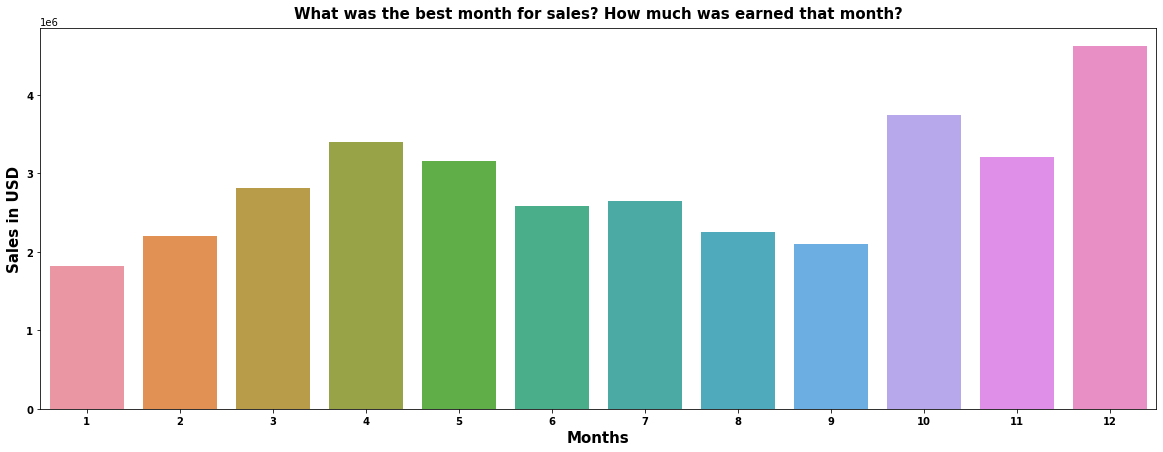

In [19]:
sale_by_month = all_data.groupby('Month').sum()
plt.figure(figsize = (20,7))
sns.barplot(x=sale_by_month.index, y=sale_by_month['Sale'], data = sale_by_month)
plt.title("What was the best month for sales? How much was earned that month?", weight="bold",fontsize=15, pad=10)
plt.xlabel("Months", weight="bold", fontsize=15)
plt.xticks(weight="bold", fontsize=10)
plt.ylabel("Sales in USD", weight="bold",fontsize=15)
plt.yticks(weight="bold", fontsize=10);

Answer: December is the best month which has a record number of sales reaching more than 4 millions dollars. 
This is could be there are important holidays in December such as Chirstmas and New Year, where people are ready to make purchase for presents or for celebration.

#### Question 2: What City had the highest number of sales?

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000., 9000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

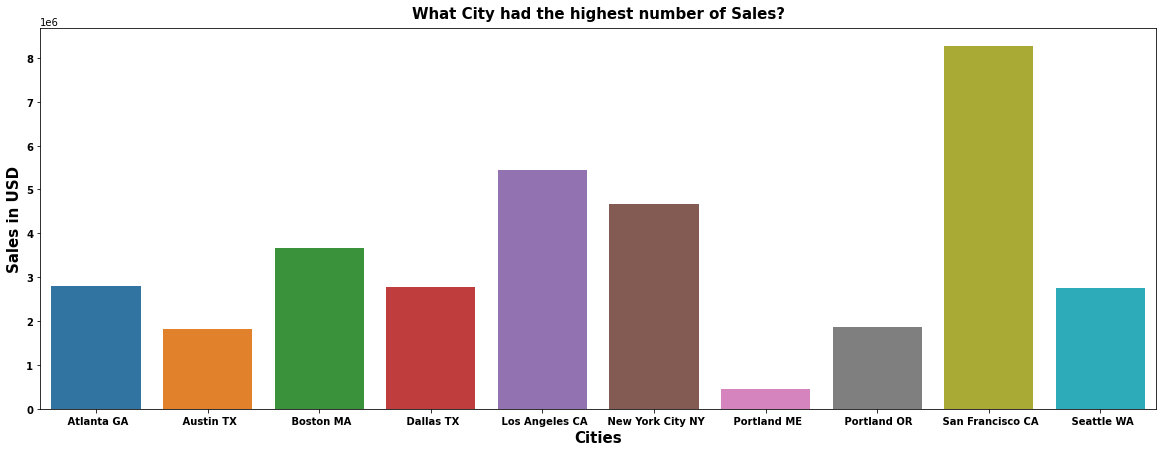

In [20]:
sale_by_city = all_data.groupby('Cities').sum()
plt.figure(figsize = (20,7))
sns.barplot(x=sale_by_city.index, y=sale_by_city['Sale'], data = sale_by_city)
plt.title("What City had the highest number of Sales?", weight = 'bold', fontsize = 15, pad = 10)
plt.xlabel('Cities', weight = 'bold', fontsize = 15)
plt.xticks(weight = 'bold', fontsize = 10)
plt.ylabel('Sales in USD', weight = 'bold', fontsize = 15)
plt.yticks(weight = 'bold', fontsize = 10)


Answer: The city which the most sales data in 2019 is San Francisco, which total sales reached more than 8 millions Dollars

#### Question 3: What time should we display adverstisement to maximize likelihood of customer's buying product?

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

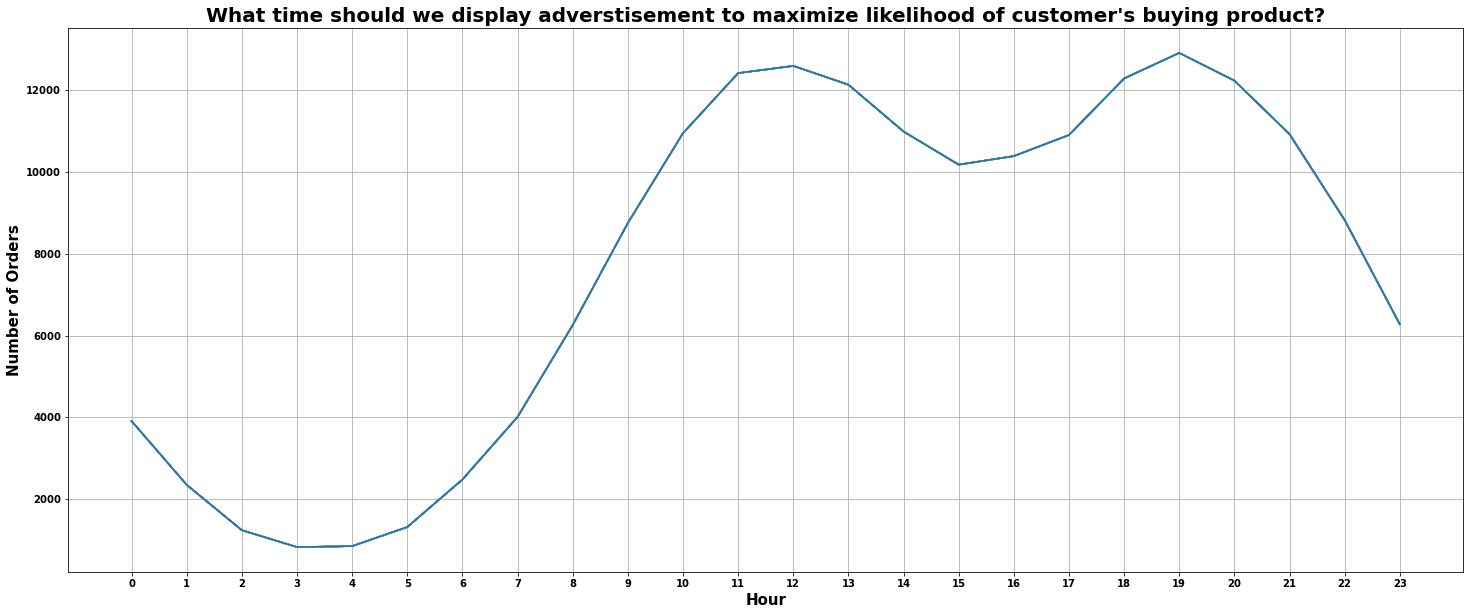

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.figure(figsize=(25,10))
plt.plot(hours, all_data.groupby(['Hour']).count())
#add grid
plt.grid(True)
plt.title("What time should we display adverstisement to maximize likelihood of customer's buying product?", weight="bold", fontsize = 20)
plt.xlabel("Hour", weight = "bold", fontsize = 15, loc = "center")
plt.xticks(ticks = hours, weight = "bold", fontsize=10)
plt.ylabel("Number of Orders", weight = "bold", fontsize = 15)
plt.yticks(weight = "bold",fontsize = 10)

The advertisement should be played at 9 am or 10 am because there is an considerable increase in Sales orders

#### Question 4: What products are most often sold together?

In [22]:
from itertools import combinations
from collections import Counter

all_data = all_data[all_data["Order ID"].duplicated(keep = False)]

#create new column
all_data["Group"] = all_data.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

all_data = all_data[["Order ID", "Group"]].drop_duplicates()

count = Counter()
for row in all_data["Group"]
as


SyntaxError: invalid syntax (<ipython-input-22-48bb30fd5d02>, line 12)